In [1]:
!pip install opencv-python

In [2]:
print ("<<<PhD Project_1>>>")

<<<PhD Project_1>>>


In [3]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

In [4]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

In [5]:
# importing necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [6]:
# read images
img1 = cv.imread(r'\Users\Basem\OneDrive\Desktop\Images\Image6.jpg') #queryImage
img2 = cv.imread(r'\Users\Basem\OneDrive\Desktop\Images\Image8.jpg') # trainImage

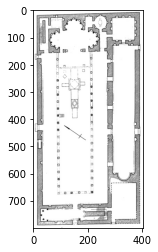

In [7]:
# show img1
plt.imshow(img1)

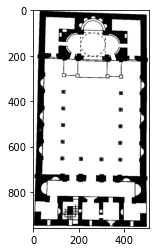

In [8]:
# show img2
plt.imshow(img2)

In [9]:
# Initiate SIFT detector
sift = cv.SIFT_create()

In [10]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [11]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

In [12]:
flann = cv.FlannBasedMatcher(index_params,search_params)

In [13]:
matches = flann.knnMatch(des1,des2,k=2)

In [14]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

In [15]:
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

In [16]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

In [17]:
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

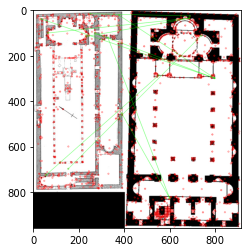

(<matplotlib.image.AxesImage at 0x12b6906c580>, None)

In [18]:
plt.imshow(img3,),plt.show()